[[ -32.52857143]
 [3286.21428571]]


/var/folders/p1/vychbyg51cs0s16tvzh88pk00000gn/T/ipykernel_9594/623057116.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date['index']=cmp1


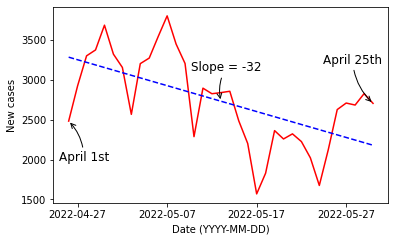

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

df = pd.read_csv('covid_data.csv')

cases=df[["Date_reported","Country","New_cases"]]

cases=cases.loc[cases['Country']== 'India']

date=cases.loc[(cases['Date_reported'] >= '2022-04-26')& (cases['Date_reported'] < '2022-05-31')]


cmp=range(0,)
cmp1=range(0,35)
date['index']=cmp1

X1= date.iloc[:,3].values.reshape(-1,1)
X= date.iloc[:,0]
Y= date.iloc[:,2].values.reshape(-1,1)

x=X1.flatten()


current_figure = plt.gcf()
current_figure.autofmt_xdate()
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X1, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X1)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(X,Y,'r-')
plt.plot(X1,Y_pred,'b--')

plt.annotate(r'Slope = -32', 
             xy=(17,Y_pred[17]), 
             xycoords='data',
             
             xytext=(-30, 30),
             textcoords='offset points',
             fontsize=12,  
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
            )
plt.annotate(r'April 1st', 
             xy=(0,Y[0]), 
             xycoords='data',
             
             xytext=(-10, -40),
             textcoords='offset points',
             fontsize=12,  
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
            )
plt.annotate(r'April 25th', 
             xy=(34,Y[34]), 
             xycoords='data',
             
             xytext=(-50, 40),
             textcoords='offset points',
             fontsize=12,  
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
            )
plt.plot
plt.xlabel("Date (YYYY-MM-DD)")
plt.ylabel("New cases")
slope_intercept = np.polyfit(x,Y_pred,1)
print(slope_intercept)

plt.show()

